In [13]:
# --- Cell 1: Our Toolkit (Importing Libraries) ---
# First, let's gather the tools we'll need for this analysis.
import pandas as pd  # For handling our data
import numpy as np   # For numerical magic
import matplotlib.pyplot as plt # For creating our plots
from sklearn.preprocessing import StandardScaler # A tool to put all features on the same scale
from sklearn.decomposition import PCA          # The star of our show!

In [14]:
# --- Cell 2: Loading Our Clean Data ---
# We'll start with the clean dataset we prepared in the previous notebook.

print("--- Step 1: Loading the clean dataset ---")
df = pd.read_csv('../data/heart_disease_cleaned.csv')

# Good practice is to "trust, but verify." Let's do a quick check to make sure
# the file we just loaded has no missing values.
if df.isnull().sum().sum() > 0:
    # If this error appears, something went wrong in the previous notebook!
    raise ValueError("The cleaned data file still contains missing values. Please re-run notebook 01.")
else:
    print("Dataset successfully loaded and verified to be 100% clean. Ready to go!")

--- Step 1: Loading the clean dataset ---
Dataset successfully loaded and verified to be 100% clean. Ready to go!


In [15]:
# --- Cell 3: Preparing the Data for PCA ---
# Before we can use PCA, we need to do two quick preparation steps.

# Step 3a: Separate our data into features (the inputs, X) and the target (what we want to predict, y).
# PCA is an "unsupervised" technique, meaning it only looks at the features (X).
print("\n--- Step 2: Separating features (X) from our target (y) ---")
X = df.drop('target', axis=1)
y = df['target']
print("Preparation complete.")

# Step 3b: Put all features on the same scale.
# Think of it this way: 'cholesterol' has values in the hundreds, while 'sex' is 0 or 1.
# PCA can be biased by these large numbers. Scaling ensures every feature gets a fair shot.
print("\n--- Step 3: Scaling all features to a common standard ---")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("All features are now scaled and ready for PCA.")


--- Step 2: Separating features (X) from our target (y) ---
Preparation complete.

--- Step 3: Scaling all features to a common standard ---
All features are now scaled and ready for PCA.


In [16]:
# --- Cell 4: The Main Event - Applying PCA ---
# With our data prepared, it's time to perform the analysis.
# We'll ask PCA to find the new "principal components" that best summarize our data.

print("\n--- Step 4: Applying Principal Component Analysis (PCA) ---")
# We'll start by asking for all possible components to see how much each one helps.
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print("PCA has successfully transformed our data!")


--- Step 4: Applying Principal Component Analysis (PCA) ---
PCA has successfully transformed our data!



--- Step 5: Analyzing how many components to keep ---


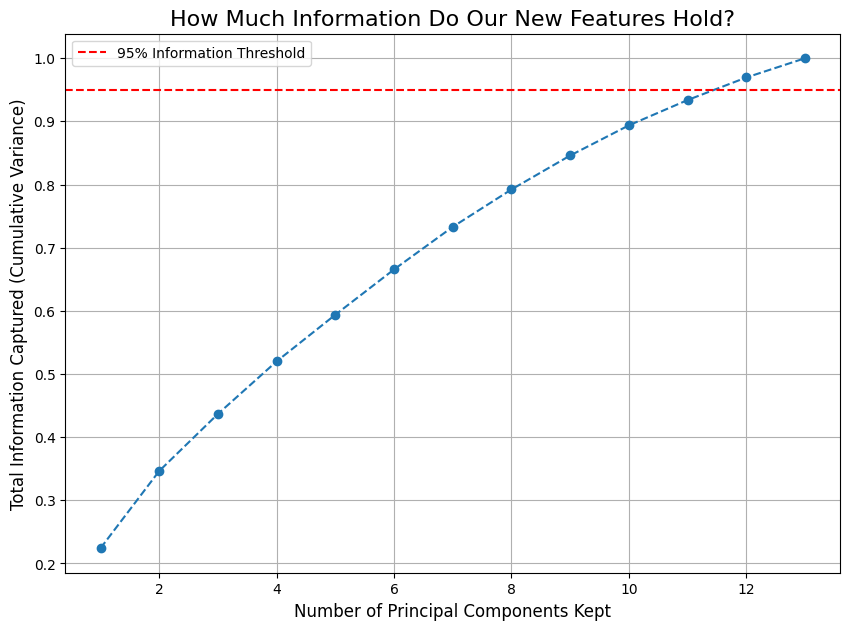


To capture 95% of the information, we only need to keep 12 of the original 13 features!


In [17]:
# --- Cell 5: How Many "Super-Features" Do We Really Need? ---
# PCA has given us 13 new features (principal components). But how many are actually useful?
# This graph will show us how much of the original data's "story" (variance) is captured
# as we add more components.

print("\n--- Step 5: Analyzing how many components to keep ---")
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('How Much Information Do Our New Features Hold?', size=16)
plt.xlabel('Number of Principal Components Kept', size=12)
plt.ylabel('Total Information Captured (Cumulative Variance)', size=12)
plt.grid(True)
# A common goal is to keep enough components to capture 95% of the original information.
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Information Threshold')
plt.legend()
plt.show()

# Let's find out exactly how many components we need to hit that 95% mark.
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"\nTo capture 95% of the information, we only need to keep {n_components_95} of the original 13 features!")


--- Step 6: Visualizing the data using the top two components ---


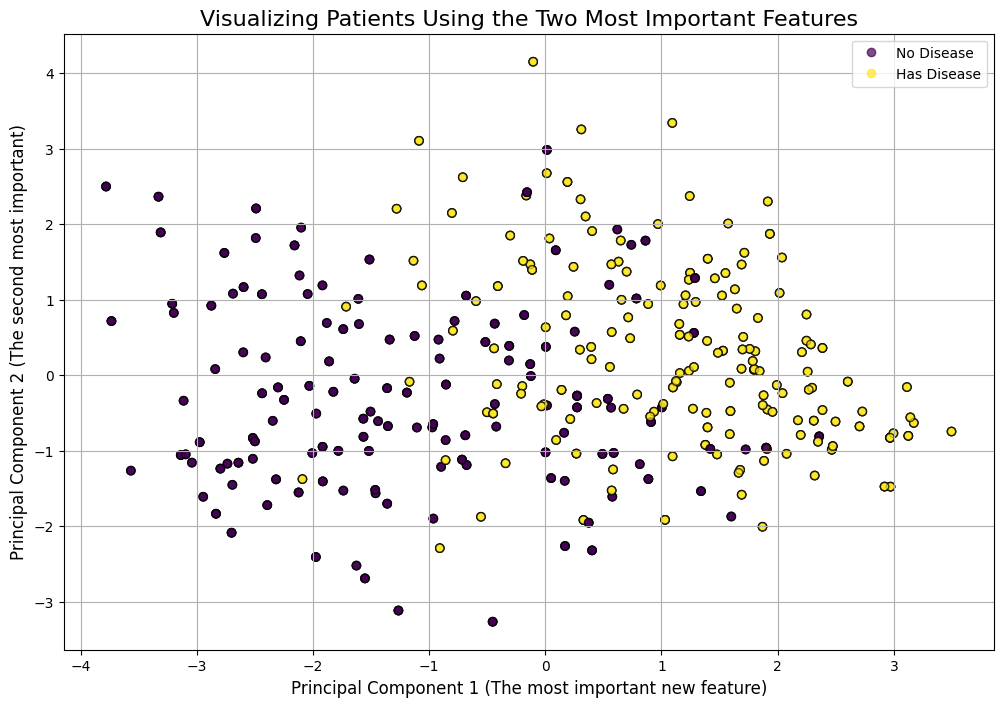

In [18]:
# --- Cell 6: Let's See What PCA Found (A 2D Visualization) ---
# The best way to get a feel for PCA is to see it. Let's plot our data using only
# the first two most powerful principal components. Can these two "super-features" alone
# begin to separate patients with and without heart disease?

print("\n--- Step 6: Visualizing the data using the top two components ---")
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('Visualizing Patients Using the Two Most Important Features', size=16)
plt.xlabel('Principal Component 1 (The most important new feature)', size=12)
plt.ylabel('Principal Component 2 (The second most important)', size=12)
plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Has Disease'])
plt.grid(True)
plt.show()